# Code for Inna :)
my lovely ex!

$$C_i = 1000 + 0.8R_i + u_i$$

In [7]:
R_i = np.array([4000, 5000, 5000, 5000, 6000, 7000, 12000, 20000, 25000, 30000])

In [46]:
len(R_i) #verify there are indeed 10

10

In [9]:
u_i = np.array([2672, -1205, -1254, -1825, -2994, -47, 684, -4576, -898, -805])

In [10]:
len(u_i)

10

In [31]:
# We import the array library
import numpy as np

In [32]:
#We use the above formula to calculate each C_is, that are given by the True model.
C_i = 1000+0.8*R_i+u_i

In [13]:
#Let's take a look at the results:
C_i

array([  6872.,   3795.,   3746.,   3175.,   2806.,   6553.,  11284.,
        12424.,  20102.,  24195.])

Now suppose, the only thing you observed was the C_is and R_is! 
You don't know the true model:
$$C_i = 1000 + 0.8R_i + u_i$$

you suppose it's:

$$C_i = Constant + Beta_1*R_i + Error_i$$
And You don't know the u_i either, but you **DO KNOW** that on average, *u_i* is 0 (zero). 
Let's estimate the model using least squares. 

In [38]:
R_i_augmented = np.vstack([R_i, np.ones(len(R_i))]).T 
#np.ones adds a column of ones to our Matrix, vstack = vertical stack

slope, constant = np.linalg.lstsq( R_i_augmented, C_i)[0]
print("Our slope is (Beta1)  ", slope)
print("Our estimated constant is ", constant)


Our slope is (Beta1)   0.75537965979
Our estimated constant is  506.182048498


Great!, Now that we have estimated our Coefficients, let's see how good our model is in estimating the reality.


In [39]:
C_estimates = slope*R_i + constant

Let's take a quick look at what we've got

In [40]:
C_estimates

array([  3527.70068766,   4283.08034745,   4283.08034745,   4283.08034745,
         5038.46000724,   5793.83966703,   9570.73796598,  15613.7752443 ,
        19390.67354325,  23167.5718422 ])

The Errors are just the difference between C_i (real) and C_estimates (what we estimated)

In [43]:
Errors = C_i - C_estimates
print(Errors)

[ 3344.29931234  -488.08034745  -537.08034745 -1108.08034745 -2232.46000724
   759.16033297  1713.26203402 -3189.7752443    711.32645675  1027.4281578 ]


Let's verify that the sum of the Errors are indeed zero. (The model makes them equal to zero)

In [45]:
sum(Errors)

-5.8662408264353871e-11

Indeed! It's zero! :)

In [47]:
import matplotlib.pyplot as plt


In [66]:
plt.clf
plt.plot(R_i, C_i, 'o-', label="Original Data", markersize =10)
plt.plot(R_i, C_estimates,'^-', label="Estimated C_i")
plt.xlabel("R_i")
plt.ylabel("C_i")
plt.legend()

plt.savefig('Grafic.png')
plt.show()

In [67]:
from IPython.display import Image


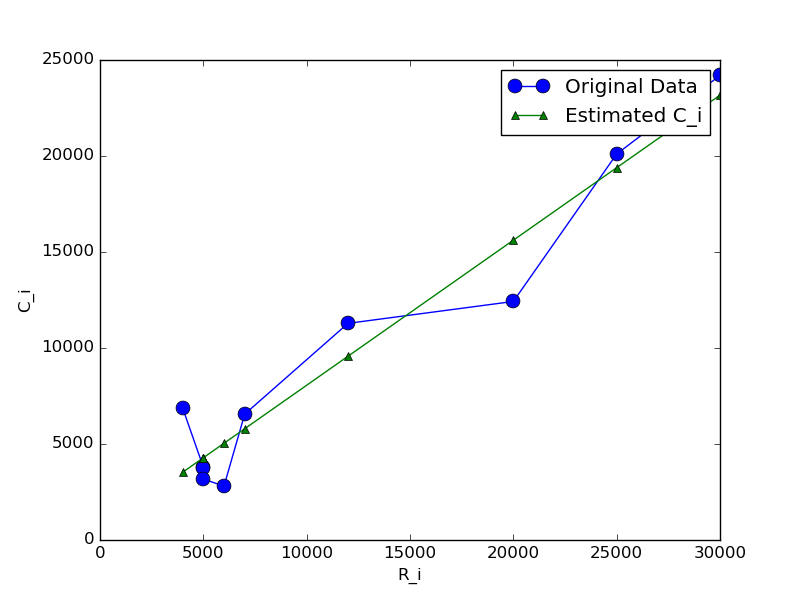

In [68]:
Image(filename="Grafic.png")